# Day 8 教學範例

In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import math

img = cv2.imread('data/lena.png')

## 製作噪聲圖片

(-0.5, 511.5, 511.5, -0.5)

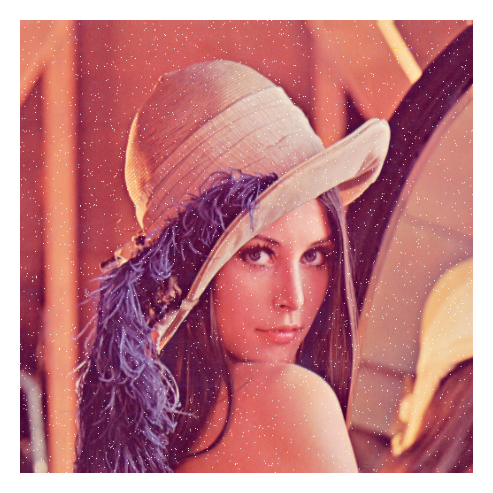

In [2]:
row, col, _ = img.shape
img_noise = img.copy()

for i in range(row):
    for j in range(col):
        seed = random.random()
        if seed < 0.01:
            # 加入白噪聲
            img_noise[i, j] = np.array([255, 255, 255], dtype = 'uint8')

plt.figure(figsize = (3, 3), dpi = 200)
plt.imshow(img_noise[:, :, [2, 1, 0]])
plt.axis('off')

## Blur (模糊)
1. Averaging Blur
2. Gaussion Blur

In [13]:
# average blur

# make average filter
average_filter = np.ones((3, 3)) / 9

# filtering
img_average = cv2.filter2D(img_noise, -1, average_filter)

In [14]:
# gaussian blur
# make gaussian filter
gaussian_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

img_gaussian = cv2.filter2D(img_noise, -1, gaussian_filter)

In [16]:
img_NL = cv2.fastNlMeansDenoisingColored(img_noise,None,10,10,7,21)

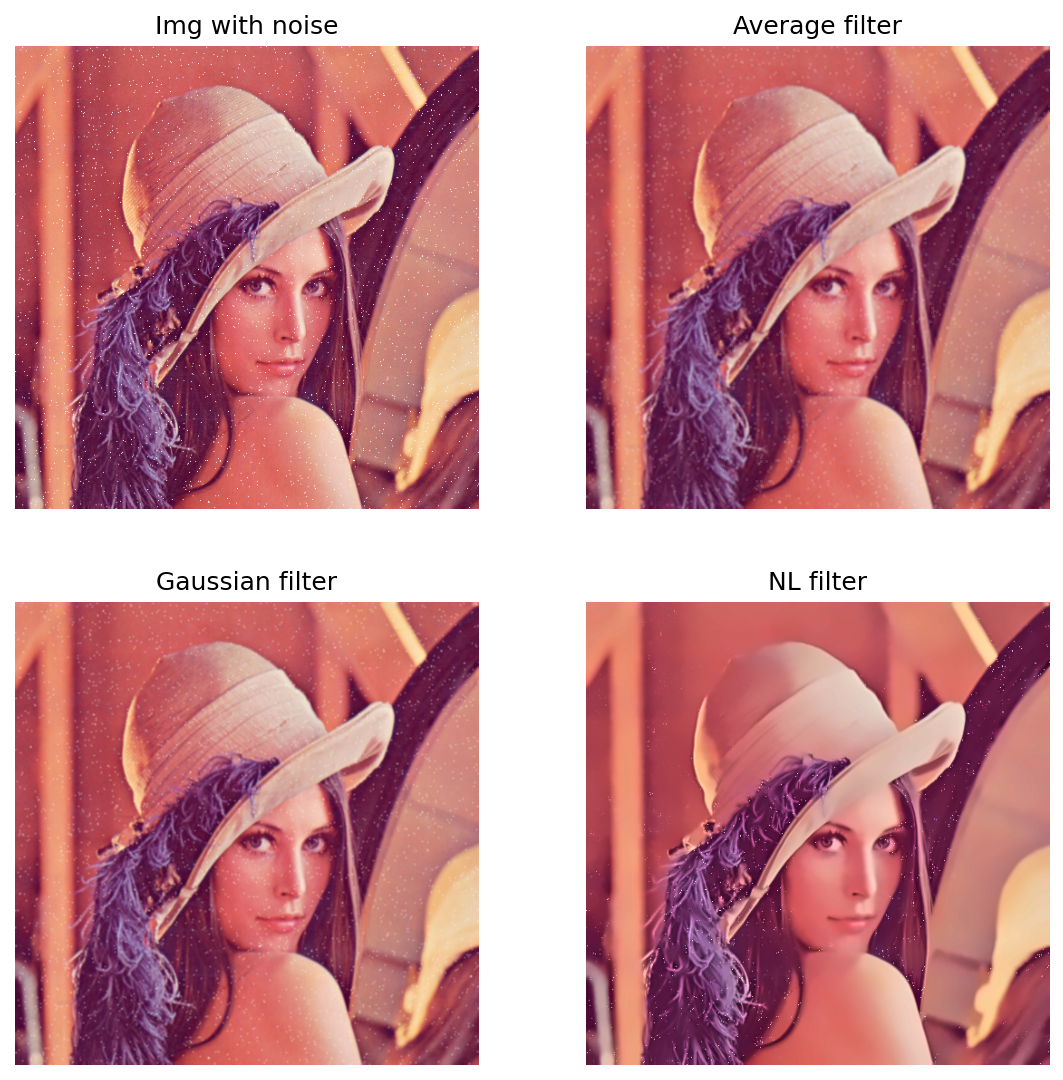

In [27]:
plt.figure(figsize = (9, 9), dpi = 150)

show_img = [img_noise, img_average, img_gaussian, img_NL]
show_name = ['Img with noise', 'Average filter', 'Gaussian filter', 'NL filter']
for i in range(len(show_img)):
    plt.subplot(2, 2, i + 1, title = show_name[i])
    plt.imshow(show_img[i][:, :, [2, 1, 0]])
    plt.axis('off')

# 邊緣偵測
1. 得到垂直與水平的邊緣
2. 將兩者做結合
3. 設定門檻值以處理介在 0~255之外的值


In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Get x edge
sobel_x = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

Gx = cv2.filter2D(gray, -1, sobel_x)

# Get y edge
sobel_y = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

Gy = cv2.filter2D(gray, -1, sobel_y)

Gx = cv2.convertScaleAbs(Gx)
Gy = cv2.convertScaleAbs(Gy)

edge = cv2.addWeighted(Gx, 0.5, Gy, 0.5, 0)

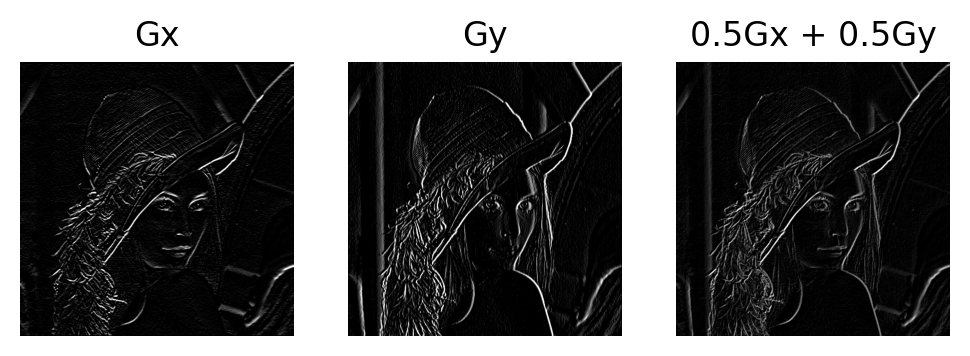

In [4]:
plt.figure(dpi = 200)

show_img = [Gx, Gy, edge]
show_name = ['Gx', 'Gy', '0.5Gx + 0.5Gy']
for i in range(len(show_img)):
    plt.subplot(1, 3, i + 1, title = show_name[i])
    plt.imshow(show_img[i], cmap = 'gray')
    plt.axis('off')

In [20]:
gaussian_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

gray_gaussian = cv2.filter2D(gray, -1, gaussian_filter)
edge_canny = cv2.Canny(gray_gaussian, 50, 150)

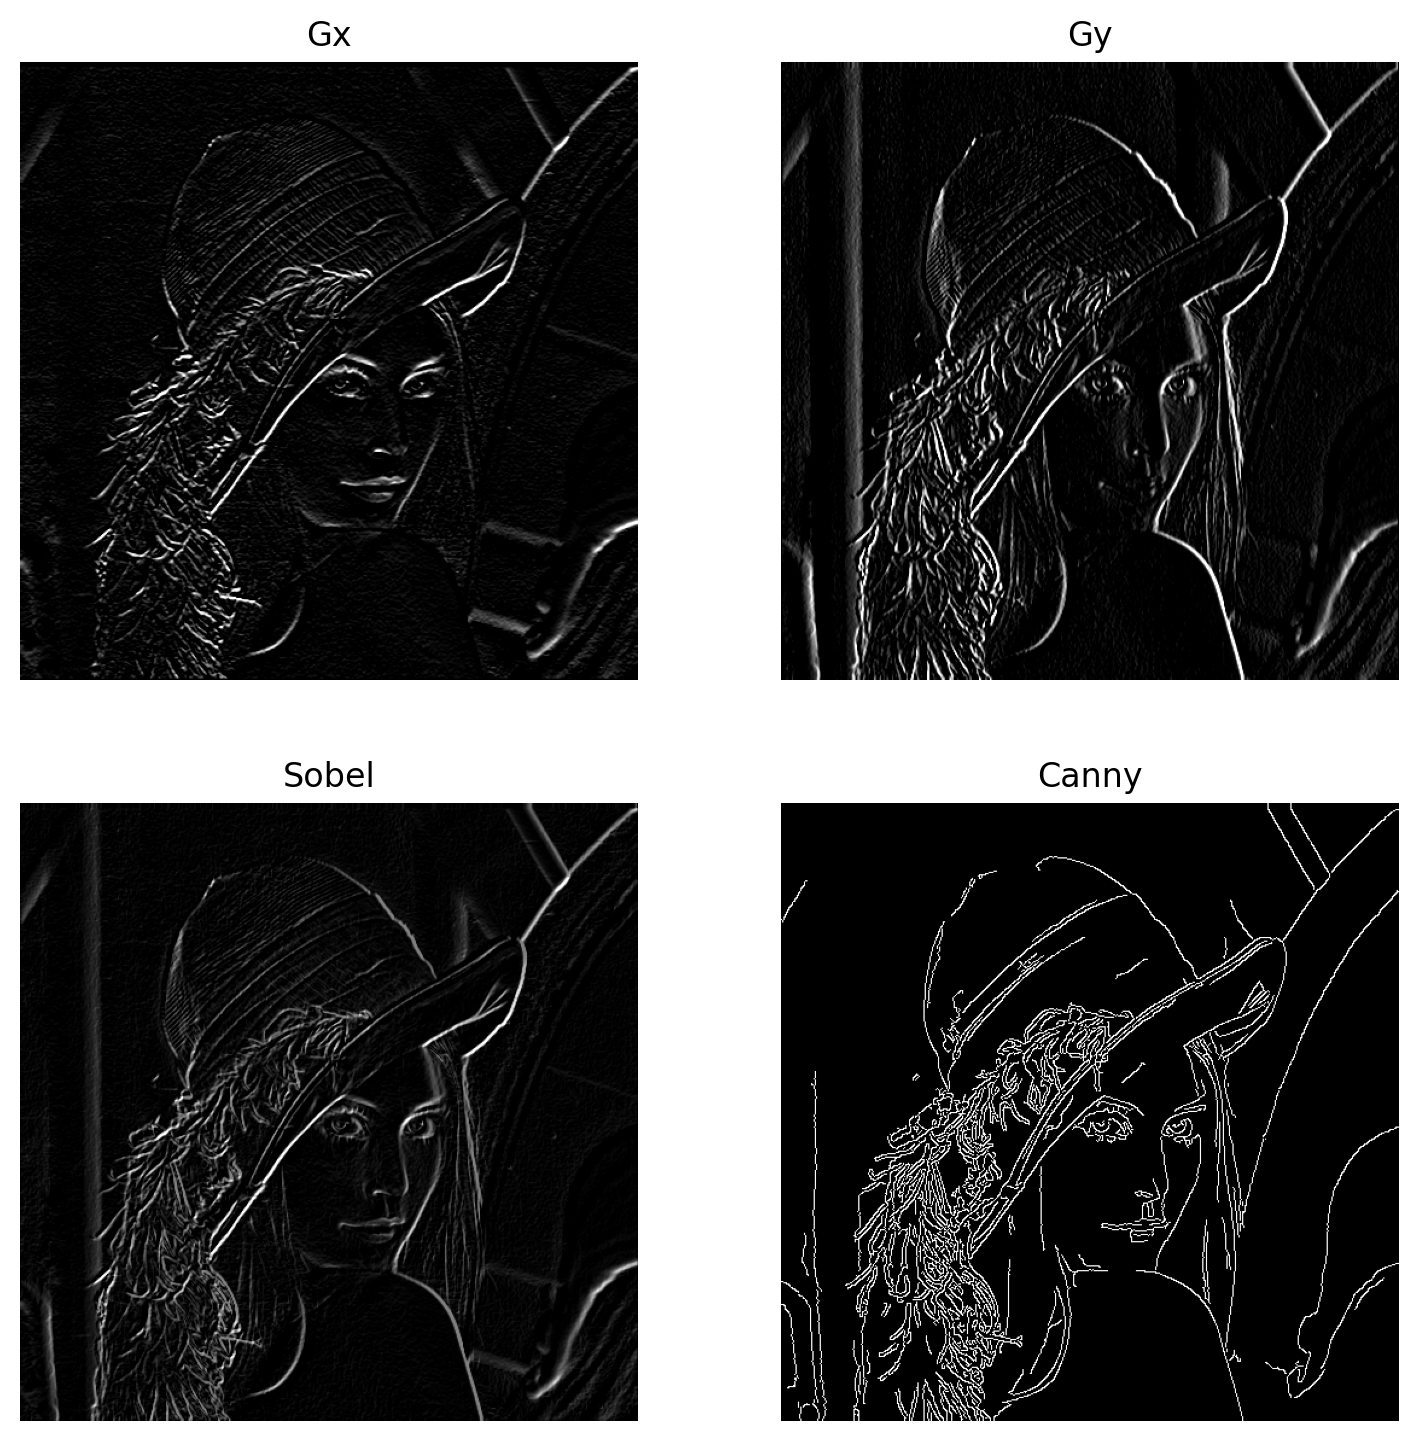

In [33]:
plt.figure(figsize = (9, 9), dpi = 200)

show_img = [Gx, Gy, edge, edge_canny]
show_name = ['Gx', 'Gy', 'Sobel', 'Canny']
for i in range(len(show_img)):
    plt.subplot(2, 2, i + 1, title = show_name[i])
    plt.imshow(show_img[i], cmap = 'gray')
    plt.axis('off')